In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/deforestation_dataset.csv')
df.head()
type(df)

pandas.core.frame.DataFrame

In [ ]:
df=df.dropna(how="all")
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,3,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,1,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,4,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,0,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,0,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869


Index(['Country', 'Year', 'Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent',
       'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
       'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
       'Corruption_Index', 'International_Aid_Million_USD',
       'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col=['Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent',
       'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
       'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
       'Corruption_Index', 'International_Aid_Million_USD',
       'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']
for i in col:
  df[i]=scaler.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,3,1971,0.012821,0.895570,0.613734,0.316067,0.884583,0.513911,0.992853,0.666667,0.093442,0.476954,0.923858,0.070733
1,1,1927,0.629780,0.375823,0.693133,0.224149,0.853720,0.531714,0.071035,1.000000,0.024759,0.837675,0.385787,0.598952
2,4,1961,0.891363,0.380773,0.600858,0.371382,0.412655,0.581930,0.697606,0.333333,0.521135,0.372745,0.238579,0.708461
3,0,1967,0.709627,0.000000,0.572961,0.268371,0.725296,0.508475,0.001824,1.000000,0.237278,0.380762,0.000000,0.706588
4,0,1987,0.490103,0.787313,0.927039,0.375533,0.149801,0.112130,0.078517,1.000000,0.214205,0.318637,0.197970,0.519609


In [ ]:
from sklearn.model_selection import train_test_split
X=df[['Forest_Loss_Area_km2','CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
       'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
       'Corruption_Index', 'International_Aid_Million_USD',
       'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent']]
Y=df["Tree_Cover_Loss_percent"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import numpy as np

# Train an SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, Y_train)

# Evaluate the model on the training data
Y_train_pred = svm_model.predict(X_train)
train_mse = (mean_squared_error(Y_train, Y_train_pred))
train_rmse = root_mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
print(f"Training MAE:{train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R2_Score:{train_r2}")
print(f"Training RMSE: {train_rmse}")

Training MAE:0.23373436518216523
Training MSE: 0.08678576007893893
Training R2_Score:0.07707858885232277
Training RMSE: 0.2945942295411418


In [ ]:
# Evaluate the model on the test data
Y_test_pred = svm_model.predict(X_test)
test_mse = (mean_squared_error(Y_test, Y_test_pred))
test_rmse= root_mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R2_Score: {test_r2}"

Test RMSE: 0.2744663227057204
Test MAE: 0.24390124022492113
Test MSE: 0.07533176229960065
Test R2_Score: -0.07474737955567257


In [ ]:
# Display feature importance (coefficients)
feature_names = X_train.columns
coefficients = svm_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Coefficients):")
print(feature_importance)

Feature Importance (Coefficients):
                            Feature  Coefficient
10          Protected_Areas_Percent     0.209532
5          Agriculture_Land_Percent     0.142902
8     International_Aid_Million_USD     0.109595
9       Illegal_Lumbering_Incidents     0.107256
6   Deforestation_Policy_Strictness     0.087231
0              Forest_Loss_Area_km2     0.035986
7                  Corruption_Index    -0.007574
2                       Rainfall_mm    -0.079333
1                   CO2_Emission_mt    -0.094832
3                        Population    -0.244298
4                   GDP_Billion_USD    -0.267866


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1],
    'kernel': ['linear', 'rbf']
}
print(param_grid)

{'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1], 'kernel': ['linear', 'rbf']}


In [ ]:
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Create a new SVR model instance with the best parameters
best_svm_model = SVR(**grid_search.best_params_)

# Train this new SVR model using the entire training dataset
best_svm_model.fit(X_train, Y_train)

# Make predictions on the test dataset
Y_test_pred_tuned = best_svm_model.predict(X_test)

# Calculate evaluation metrics for the tuned model on the test data
test_mse_tuned = mean_squared_error(Y_test, Y_test_pred_tuned)
test_rmse_tuned = root_mean_squared_error(Y_test, Y_test_pred_tuned)
test_r2_tuned = r2_score(Y_test, Y_test_pred_tuned)
test_mae_tuned = mean_absolute_error(Y_test, Y_test_pred_tuned)

# Print the calculated evaluation metrics
print("Tuned Model Test Metrics:")
print(f"Test RMSE: {test_rmse_tuned}")
print(f"Test MAE: {test_mae_tuned}")
print(f"Test MSE: {test_mse_tuned}")
print(f"Test R2_Score: {test_r2_tuned}")

Tuned Model Test Metrics:
Test RMSE: 0.26980040144290607
Test MAE: 0.24075869161976993
Test MSE: 0.07279225661875328
Test R2_Score: -0.03851661855206445


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance on the test set
perm_importance = permutation_importance(best_svm_model, X_test, Y_test, n_repeats=10, random_state=42)

# Organize results into a DataFrame
feature_names = X_test.columns
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(perm_importance_df)

Permutation Importance:
                            Feature  Importance
3                        Population    0.034349
10          Protected_Areas_Percent    0.014530
8     International_Aid_Million_USD    0.005909
5          Agriculture_Land_Percent    0.005754
1                   CO2_Emission_mt    0.003167
7                  Corruption_Index   -0.000022
0              Forest_Loss_Area_km2   -0.000988
6   Deforestation_Policy_Strictness   -0.001739
4                   GDP_Billion_USD   -0.003953
2                       Rainfall_mm   -0.005672
9       Illegal_Lumbering_Incidents   -0.016269


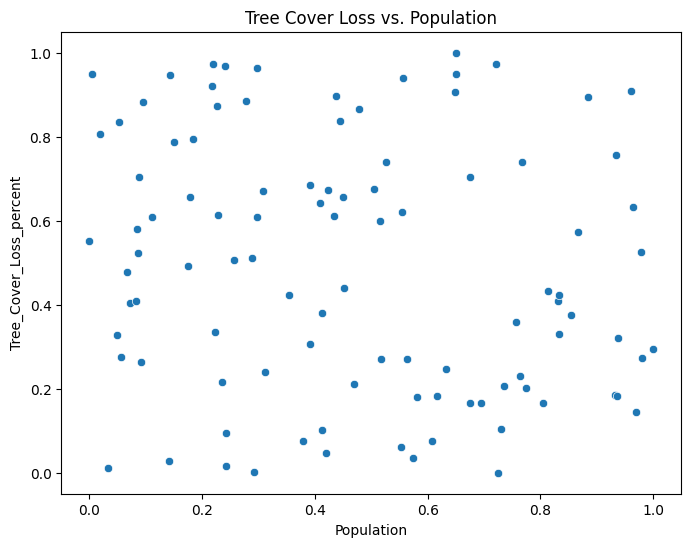

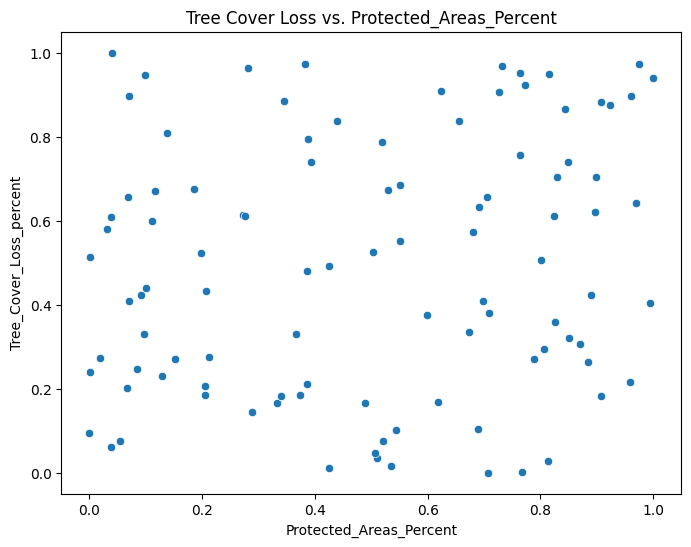

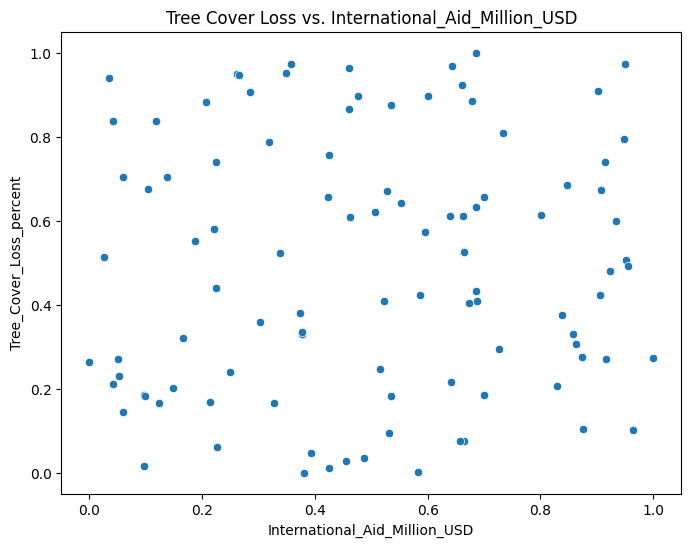

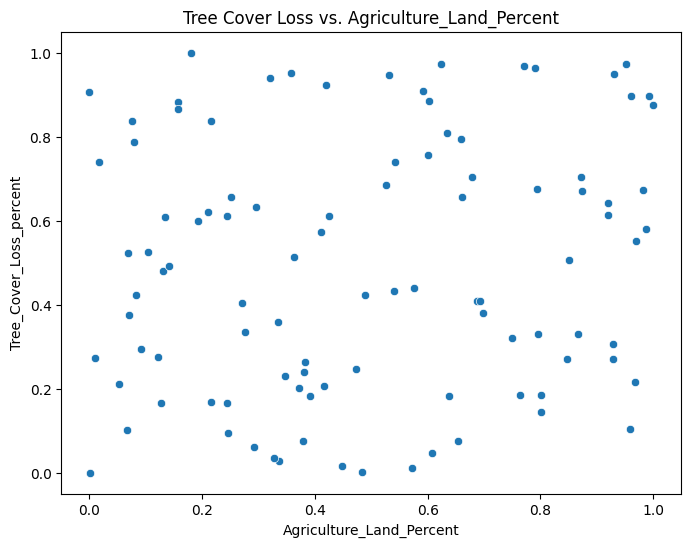

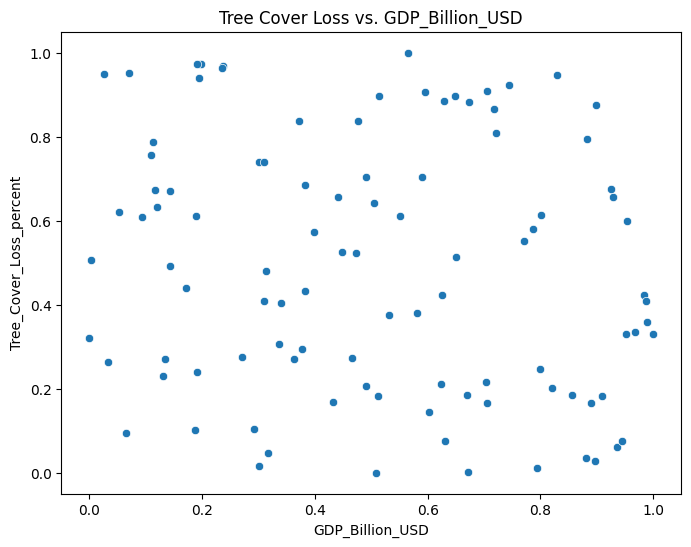

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for some key features against Tree_Cover_Loss_percent
features_to_visualize = ['Population', 'Protected_Areas_Percent', 'International_Aid_Million_USD', 'Agriculture_Land_Percent', 'GDP_Billion_USD']

for feature in features_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='Tree_Cover_Loss_percent')
    plt.title(f'Tree Cover Loss vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tree_Cover_Loss_percent')
    plt.show()

 Summary

This analysis aimed to predict 'Tree_Cover_Loss_percent' using various socio-economic and environmental factors. After initial data cleaning and preprocessing, an SVR model was trained and tuned using GridSearchCV. The best hyperparameters found were `{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}`. However, the tuned model exhibited poor performance on the test set, as indicated by a negative R2 score (-0.039), suggesting it performed worse than a simple mean prediction. Permutation importance analysis on this specific model highlighted 'Population', 'Protected_Areas_Percent', and 'International_Aid_Million_USD' as the most influential features, though the model's overall poor performance limits the reliability of these feature importance findings. Given the unsatisfactory model performance, further investigation into alternative models, advanced feature engineering, or exploring different modeling approaches is recommended to achieve a more accurate and reliable understanding of the key drivers of tree cover loss.